# Práctica Nro. 1

En esta práctica se utiliza el módulo sympy para la manipulación de números complejos y operaciones de cálculo diferencial e integral. Se puede obtener ayuda en:
- [Evaluación numérica](https://docs.sympy.org/latest/modules/evalf.html)
- [Funciones elementales con números complejos](https://docs.sympy.org/latest/modules/functions/elementary.html)
- [Cálculo diferencial e integral](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)

Primero importamos los módulos necesarios.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy import re, im, I, symbols

## Ejercicio 1

$i^2 = -1$ por definición de $i$. Pero si utilizamos la regla de multiplicación de números complejos a partir del producto de números reales:
$$(a + ib) ( c + id) = (ac-bd) + i(bc + ad)$$
y considerando que $i = (0 + 1 i)$ (esto es: $a = 0, b=1, c=0, b=1$):
$$ \begin{align*}
i^2 &= i i \\
    &= (0 + 1i)(0 + 1i) \\
    &= (0 \cdot 0 - 1 \cdot 1) + i (1 \cdot 0 + 0 \cdot 1) \\
    &= -1 + i 0 = -1
    \end{align*} $$
    
Usando este resultado podemos seguir con el resto de las potencias:
$$ i^3 = i^2 i = (-1) i = -i$$
$$ i^4 = i^2 i^2 = (-1)(-1) = 1 $$
$$ i^5 = i^4 i = i $$

Para las potencias inversas multiplicamos el numerador y denominador por el conjugado del denominador, de modo de eliminar el número complejo en el denominador:
$$ i^{-1} = \frac{1}{i} = \frac{1 \bar{i}}{i \bar{i}} = \frac{1 (-i)}{i (-i)} = \frac{(1 + 0i)(0 - i)}{(0 + i)(0 -i)} = \frac{1 \cdot 0 + 0 \cdot 1}{0^2 + 1^2} + i \frac{0 \cdot 0 - 1 \cdot 1}{0^2 + 1^2} = 0 - i = -i $$

A partir del resultado anterior:
$$ \frac{1}{i^2} = \frac{1}{i} \cdot \frac{1}{i} = (-i)(-i) = (-1)i \cdot (-1) i = i^2 = -1 $$
$$ \frac{1}{i^3} = \frac{1}{i^2} \cdot \frac{1}{i} = (-1)(-i) = i $$
$$ \frac{1}{i^4} = \frac{1}{i^2} \cdot \frac{1}{i^2} = (-1)(-1) = 1 $$

Python puede manipular números complejos en forma nativa, por lo que podemos hacer las operaciones anteriores en forma computacional:

In [2]:
print(f"i^2 = {(0 + I)**2}")

i^2 = -1


In [3]:
for n in range(3, 6):
    mensaje = f"i^{n} = {(0 + I)**n}"
    print(mensaje)

i^3 = -I
i^4 = 1
i^5 = I


In [4]:
for n in range(1, 5):
    mensaje = f"1 / i^{n} = i^({-n}) = {(0 + I)**(-n)}"
    print(mensaje)

1 / i^1 = i^(-1) = -I
1 / i^2 = i^(-2) = -1
1 / i^3 = i^(-3) = I
1 / i^4 = i^(-4) = 1


## Ejercicio 2

En este ejercicio vamos a utilizar las funciones `abs(z)` y `arg(z)` de SymPy para obtener el módulo y el argumento del número complejo $z$, respectivamente. Para el primer caso, en que $z = z_1 = 1 + i$:

In [5]:
z1 = 1 + I
print(f"|z| = {abs(z1)}, arg(z) = {arg(z1)}")
print(f"|z i| = {abs(z1 * I)}, arg(z i) = {arg(z1 * I)}")
print(f"arg(z1 i) - arg(z1) = {arg(z1 * I)} - {arg(z1)} = {arg(z1 * I) - arg(z1)}")

|z| = sqrt(2), arg(z) = pi/4
|z i| = sqrt(2), arg(z i) = 3*pi/4
arg(z1 i) - arg(z1) = 3*pi/4 - pi/4 = pi/2


Podemos repetir el cálculo para los otros dos valores del ejercicio, pero aprovechamos que Python es un lenguaje de programación para repetir código y escribir menos. Además, pasamos a una representación en grados (en vez de radianes) para los argumentos de los complejos, de modo de facilitar la representación gráfica.

In [6]:
zetas = [1 + I, -1 + 2 * I, 4 - 3 * I]
for z in zetas:
    print(f" z = {z}")
    print(f"|z| = {abs(z)}, arg(z) = {math.degrees(arg(z))}")
    print(f"|z i| = {abs(z * I)}, arg(z i) = {math.degrees(arg(z * I))}")
    delta_arg = arg(z * I) - arg(z)
    print(f"arg(z i) - arg(z) = {math.degrees(delta_arg)}")
    print(30 * "-")

 z = 1 + I
|z| = sqrt(2), arg(z) = 45.0
|z i| = sqrt(2), arg(z i) = 135.0
arg(z i) - arg(z) = 90.0
------------------------------
 z = -1 + 2*I
|z| = sqrt(5), arg(z) = 116.56505117707799
|z i| = sqrt(5), arg(z i) = -153.434948822922
arg(z i) - arg(z) = -270.0
------------------------------
 z = 4 - 3*I
|z| = 5, arg(z) = -36.86989764584402
|z i| = 5, arg(z i) = 53.13010235415598
arg(z i) - arg(z) = 90.0
------------------------------


## Ejercicio 3

Es simple realizar las operaciones aritméticas con los valores indicados para $z_1$ y $z_2$. Podemos aprovechar las capacidades simbólicas del módulo SymPy definiendo ambas cantidades como números abstractos y operando sobre ellas. En Python, el operador `==` devuelve `True` si ambos argumentos (a izquierda y derecha), son iguales.

In [7]:
a, b, c, d = symbols('a b c d', real=True)
z1, z2 = a + b * I, c + d * I

In [8]:
conjugate(z1 + z2) == conjugate(z1) + conjugate(z2)

True

In [9]:
conjugate(z1 - z2) == conjugate(z1) - conjugate(z2)

True

In [10]:
conjugate(z1 * z2) == conjugate(z1) * conjugate(z2)

True

In [11]:
conjugate(z1 / z2) == conjugate(z1) / conjugate(z2)

True

## Ejercicio 4

Primero calculamos el cociente entre $z_1$ y $z_2$, recordando que si queremos hacerlo manualmente, debemos multiplicar numerador y denominador por el conjugado del denominador. Python puede hacer esto por nosotros.

In [12]:
z1 = 3 + 5 * I
z2 = 7 + 9 * I
z12 = z1 / z2
z12

(3 + 5*I)*(7 - 9*I)/130

Las funciones `re()` e `im()` de SymPy nos devuelven la parte real e imaginaria del argumento complejo que le pasemos:

In [13]:
a = re(z12)
b = im(z12)
a, b

(33/65, 4/65)

## Ejercicio 5

En este ejercicio, cada una de las regiones en el diagrama de Argand está limitada por una circunferencia:
$$ \begin{cases}
|z - (1 + i)| < 2&, \qquad C_1 \\
|z - 2 i | > \frac{3}{2}&, \qquad C_2
\end{cases}$$
$C_1$ es la región **interior** a la circunferencia de radio 2 y centrada en $(1 + i)$, mientras que $C_2$ es la región **exterior** a la circunferencia centrada en $2 i$ y de radio $3/2$. Por lo tanto, la solución es la intersección de ambas regiones (la más oscura del siguiente gráfico):

(-3.0, 5.0)

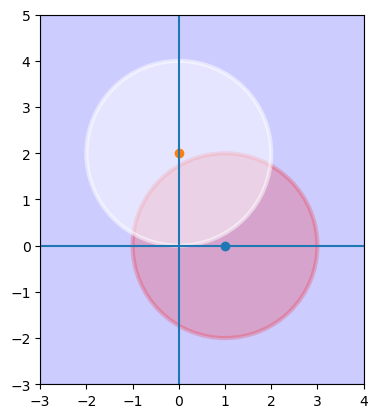

In [14]:
xinf, xsup = -3, 4
yinf, ysup = -3, 5
Rect = plt.Rectangle((xinf, yinf), 
                     xsup-xinf, ysup-yinf, 
                     color='blue', alpha=0.2) # Todo el "espacio"
C_1 = plt.Circle((1, 0), 2, color='red', linewidth=3, alpha=0.2) # Región interna
C_2 = plt.Circle((0, 2), 2, color='white', linewidth=3, alpha=0.5) # Región externa
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.add_patch(Rect)
ax.add_patch(C_1)
ax.add_patch(C_2)
plt.plot(1, 0, 'o')
plt.plot(0, 2, 'o')
plt.axhline()
plt.axvline()
plt.xlim([xinf, xsup])
plt.ylim([yinf, ysup])

## Ejercicio 6

$S$ describe una curva paramétrica en el diagrama de Argand, en la que $\Re(z(t))$ es la coordenada horizontal e $\Im(z(t))$ la vertical. AVamos a utilizar este ejemplo para ver cómo graficar con el módulo matplotlib funciones paramétricas en coordenadas cartesianas y polares.

Primero veremos la representación cartesiana. Generamos un array de numpy con los valores del parámetro $t$, y luego
definimos dos funciones que devuelven dos arrays cada uno (las coordenadas del diagrama):

In [15]:
n_puntos = 100
t = np.linspace(0, np.pi, n_puntos)

def z(t):
    return np.cos(t), np.sin(t)

def z2(t):
    return (z(t)[0])**2 - (z(t)[1])**2, 2 * z(t)[0] * z(t)[1]

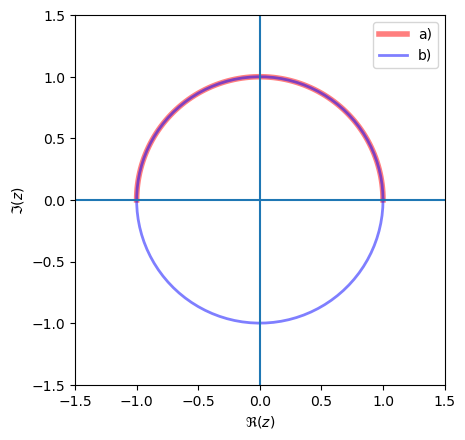

In [16]:
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
plt.plot(z(t)[0], z(t)[1], linewidth=4, color='red', alpha=0.5, label="a)")
plt.plot(z2(t)[0], z2(t)[1], linewidth=2, color='blue', alpha=0.5, label="b)")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel(r"$\Re(z)$")
plt.ylabel(r"$\Im(z)$")
plt.axhline()
plt.axvline()
plt.legend()

Si pasamos a la representación polar de $z$, vemos que 
$$z(t) = 1 e^{i t} = (1, t) $$
es decir que el módulo de $z$ es 1, y su argumento es $t$. Si ahora calculamos $z^2$ en esta representación, tenemos:
$$ (1, t)^2 = (1, t)(1, t) = (1, t + t) = (1, 2t)$$
Por lo tanto vemos que al elevar al cuadrado $z$, el valor extremo $t = \pi$ mapea a $2 \pi$. Para representar estas funciones ($z(t)$ y $z^2(t)$) en coordenadas polares, debemos suministrar dos arrays con la misma longitud. Uno de ellos representa el argumento y contiene a los valores de $t$, y el otro es el valor constante $r = 1$, por lo que es un array que contiene tantos unos como valores tiene el array `t`:

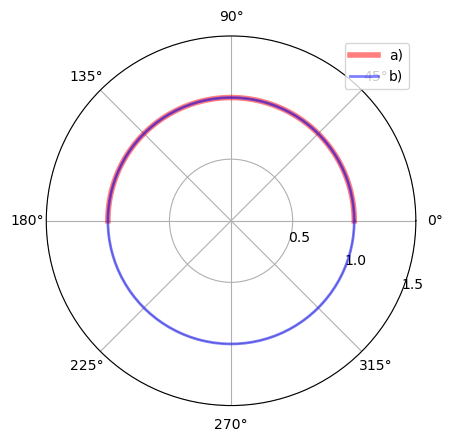

In [17]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
r = np.ones(t.size)
t2 = 2 * t
ax.plot(t, r, linewidth=4, color='red', alpha=0.5, label="a)")
ax.plot(t2, r, linewidth=2, color='blue', alpha=0.5, label="b)")
ax.set_rmax(1.5)
ax.set_rticks([0.5, 1, 1.5])  # Marcas de la escala radial
ax.set_rlabel_position(-22.5)  # Desplazamientos de las etiquetas radiales
ax.grid(True)
plt.legend()

## Ejercicio 7

Es conveniente trabajar con la representación polar para multiplicar números complejos, ya que los módulos se multiplican y los argumentos se suman. Para este caso:

In [18]:
z = 1 + I
print(f"Módulo de z = {abs(z)}, argumento de z = {arg(z)}")

Módulo de z = sqrt(2), argumento de z = pi/4


Entonces:
$$ 1 + i = \sqrt{2} \left( \cos \frac{\pi}{4} + i \sin \frac{pi}{4} \right) $$

Usando la fórmula de De Moivre, con $r = \sqrt{2}$ y $n = 20$:
$$ \begin{align*} (1 + i)^{20} &= \left(\sqrt{2} \right)^{20} \left( \cos \frac{20 \pi}{4} + i \sin \frac{ 20 pi}{4} \right) \\
&= 2^{10} (\cos 5 \pi + i \sin 5 \pi) \\
&= 2^{10} (\cos \pi + i \sin \pi) 
\end{align*} $$

Por lo tanto:
$$ \arg(z) = \pi \pm 2 n \pi, \quad n = 0, 1, 2, \cdots \quad $$

Además, notar que:
$$(1 + i)^{20} = 2^{10}(\cos \pi + i \sin \pi) = 2^{10}(-1 + i \cdot 0) = -1024$$

## Ejercicio 8

Del problema anterior tenemos que
$$ 1 + i = \sqrt{2} \left( \cos \frac{\pi}{4} + i \sin \frac{pi}{4} \right) $$
Por lo tanto
$$ \sqrt[3]{1 + i} = (1 + i)^{1/3} = \sqrt{2}^{1/3} \left( \cos \frac{\dfrac{\pi}{4} + 2 k \pi}{3} + i \sin \frac{\dfrac{\pi}{4} + 2 k \pi}{3} \right) $$
Podemos simplificar

$$ \left( \sqrt{2} \right)^{1/3} = \left( 2^{1/2} \right)^{1/3} = 2^{1/6} $$
y
$$ \frac{\dfrac{\pi}{4} + 2 k \pi}{3} = \frac{\pi / 4}{3} + \frac{2 k \pi}{3} = \frac{\pi}{12} + \frac{8 k \pi}{12} = \frac{\pi(1 + 8k)}{12} $$
Por lo tanto
$$ \sqrt[3]{1 + i} = 2^{1/6} \left[ \cos \frac{\pi(1 + 8k)}{12} + i \sin \frac{\pi(1 + 8k)}{12} \right] $$
donde $k = 0, 1, 2$ (tres raíces, tres valores de $k$). Reemplazando estos valores en la expresión anterior:
$$ \begin{align*}
k &= 0 \qquad z_0 = 2^{1/6} \left( \cos \frac{\pi}{12} + i \sin \frac{\pi}{12} \right) \\
k &= 1 \qquad z_1 = 2^{1/6} \left( \cos \frac{9 \pi}{12} + i \sin \frac{9 \pi}{12} \right) \\
k &= 2 \qquad z_2 = 2^{1/6} \left( \cos \frac{17 \pi}{12} + i \sin \frac{17 \pi}{12} \right)
\end{align*} $$

Dado que tenemos el módulo y argumentos de las raíces, las graficamos utilizando un diagrama polar en matplotlib:

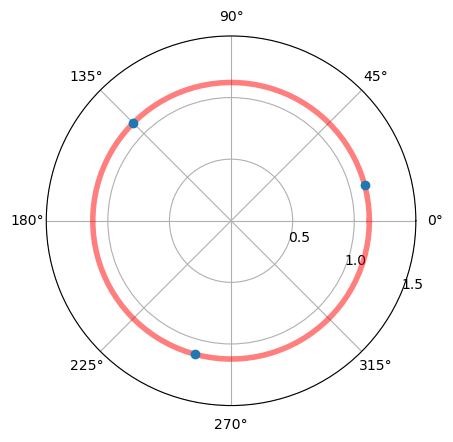

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.linspace(0, 2 * np.pi, n_puntos) # para el círculo r = |z|
r = 2**(1/6) # r = |z0| = |z1| = |z2|
z_args = [np.pi / 12, 9 * np.pi / 12, 17 * np.pi / 12] # arg(z0), arg(z1), arg(z2)
z_mod = [r, r, r] # |z0|, |z1|, |z2|
r_circ = np.ones(t.size) * r  # Para graficar el círculo
ax.plot(theta, r_circ, linewidth=4, color='red', alpha=0.5)
ax.plot(z_args, z_mod, 'o')
ax.set_rmax(1.5)
ax.set_rticks([0.5, 1, 1.5])  # Marcas de la escala radial
ax.set_rlabel_position(-22.5)  # Desplazamientos de las etiquetas radiales
ax.grid(True)

## Ejercicio 9

Para encontrar $\Re(f(z))$ e $\Im(f(z))$ en $z = 1 - i$, primero evaluamos la función:
$$ f(1-i) = \frac{1}{1 - (1 - i)} = \frac{1}{1 - 1 + i} = \frac{1}{i} = -i $$
Por inspección vemos que $\Re(f(z)) = \Re(-i) = 0$, mientras que $\Im(f(z)) = \Im(-i) = -1$.

Podemos aprovechar la capacidad de cálculo simbólico de SymPy para llegar al mismo resultado:

In [20]:
def f(z):
    return 1 / (1 - z)

fz = f(1 - I)
print(f"Re(f(z)) = {re(fz)}, Im(f(z)) = {im(fz)}")

Re(f(z)) = 0, Im(f(z)) = -1


## Ejercicio 10

Si pasamos de la representación cartesiana a la polar, tenemos $x = r \cos \theta$ y $y = r \sin \theta$, por lo que:
$$ f(z) = \frac{\Re(z)}{1 - |z|} = \frac{x}{1- |z|} = \frac{r \cos \theta}{1 - r} $$
Cuando $r \rightarrow 0$:
$$ 1 - r \rightarrow 0, \quad \text{y} \quad r \cos \theta \rightarrow 0 $$
Por lo tanto
$$ \frac{r \cos \theta}{1 - r} \rightarrow 0  \text{ cuando } r \rightarrow 0, \forall \theta $$
Dado que la definición de la función establece que $f(0) = 0$, la función es continua en $z = 0$.

Vamos a utilizar la capacidad de hacer cálculo simbólico que tiene SymPy para analizar la continuidad de $f(z)$ en $z = 0$. Primero definimos que `z` será una variable simbólica compleja, y definimos la función $f(z$):

In [21]:
z = symbols('z', real=False)

def f(z):
    if z != 0:
        return re(z) / (1 - abs(z))
    else:
        return 0

Verificamos que la función devuelve los valores apropiados:

In [22]:
f(1 + I)

1/(1 - sqrt(2))

In [23]:
f(0)

0

Ahora verificamos que el límite de $f(z)$ cuando $z \rightarrow 0$ es igual a $f(0)$:

In [24]:
limit(f(z), z, 0) == 0

True

## Ejercicio 11

Resolvemos este ejercicio utilizando SymPy, pero sugerimos enfáticamente resolverlo previamente **a mano** para familiarizarse con las operaciones con variable compleja.

Primero definimos los símbolos a utilizar, la función $f(z)$ y verificamos su expresión en términos de $x$ y $y$ expandiendo el binomio al cubo:

In [25]:
x, y = symbols('x y', real=True)

z = x + y * I

def f(z):
    return z**3

f(z).expand()

x**3 + 3*I*x**2*y - 3*x*y**2 - I*y**3

Ahora definimos $u(x, y)$ y $v(x, y)$ tomando la parte real e imaginaria, respectivamente, de $f(z)$:

In [26]:
u = re(f(z))
v = im(f(z))

In [27]:
u

x**3 - 3*x*y**2

In [28]:
v

3*x**2*y - y**3

Las condiciones de Cauchy-Riemann establecen que:
$$ \begin{align*}
\frac{\partial u(x, y)}{\partial x} &= \frac{\partial v(x, y)}{\partial y} \\ 
\frac{\partial u(x, y)}{\partial y} &= -\frac{\partial v(x, y)}{\partial x}
\end{align*} $$
O, en notación más compacta:
$$ \begin{align*}
u_x &= v_y \\ 
u_y &= -v_x
\end{align*} $$
Verificamos que se cumplen estas condiciones comparando las expresiones diferenciales de $u(x, y)$ y $v(x, y)$:

In [29]:
print(f"u_x =?= v_y : {diff(u, x) == diff(v, y)}!" )
print(f"u_y =?= -v_x : {diff(u, y) == -diff(v, x)}!")

u_x =?= v_y : True!
u_y =?= -v_x : True!


## Ejercicio 12

Resolvemos este ejercicio utilizando SymPy, pero sugerimos enfáticamente resolverlo previamente **a mano** para familiarizarse con las operaciones con variable compleja.

Primero definimos los símbolos a utilizar:

In [30]:
x, y = symbols('x y', real=True)

### Parte a)

Definimos la función $f(z)$, y obtenemos la parte real $u(x, y)$ y $v(x, y)$:

In [31]:
def f(x, y):
    return exp(-2 * x) * (cos(2 * y) - I * sin(2 * y))

u = re(f(x, y))
v = im(f(x, y))

In [32]:
f(x, y)

(-I*sin(2*y) + cos(2*y))*exp(-2*x)

In [33]:
u

exp(-2*x)*cos(2*y)

In [34]:
v

-exp(-2*x)*sin(2*y)

Verificamos si se cumplen las condiciones de Cauchy-Riemann:
$$ \begin{align*}
u_x &= v_y \\ 
u_y &= -v_x
\end{align*} $$

In [35]:
diff(u, x) == diff(v, y)

True

In [36]:
diff(u, y) == -diff(v, x)

True

Vemos que la función $f(z)$ es **analítica**.

### Parte b)

Repetimos las operaciones anteriores, pero redefiniendo primero la función:

In [37]:
def f(x, y):
    z = x + y * I
    return re(z**2) - I * im(z**2)

f(x, y)

x**2 - 2*I*x*y - y**2

In [38]:
u = re(f(x, y))
v = im(f(x, y))

In [39]:
u

x**2 - y**2

In [40]:
v

-2*x*y

Ahora verificamos las condiciones de Cauchy-Riemann:

In [41]:
diff(u, x) == diff(v, y)

False

In [42]:
diff(u, y) == -diff(v, x)

False


Ninguna de las condiciones se verifica, por lo que la función $f(z)$ de la parte b) **no es analítica**.

**Nota:** podemos observar que:
$$ (\bar{z})^2 = (x - iy)(x - iy) = x^2 - 2 i x y - y^2 = x^2 - y^2  - 2 i x y$$
Si comparamos con la función que estamos analizando vemos que:
$$ f(z) = (\bar{z})^2 = \bar{z} \cdot \bar{z} $$
Por lo tanto:
$$ f(z) = (\bar{z})^2 = \overline{(z^2)} $$
En la teoría vimos que $\bar{z}$ no es diferenciable por lo cual tampoco lo es $f(z) = (\bar{z})^2$. En conclusión $f(z)$ no es analítica. Esta derivación ofrece el mismo resultado que el cálculo anterior utilizando la representación cartesiana de $z$, pero es *mas elegante*.

## Ejercicio 13

Si $f(x, y) = u(x, y) + i v(x, y)$ debe ser analítica, las funciones $u(x, y)$ y $v(x, y)$ deben satisfacer las condiciones de Cauchy-Riemann:
$$ \begin{align*}
u_x &= v_y \\ 
u_y &= -v_x
\end{align*} $$
Dado que solo conocemos $u(x, y)$, podemos ver cómo deben ser las derivadas parciales de $v(x, y)$ para cumplir estas condiciones:

In [43]:
x, y, C = symbols('x y C', real=True)

def u(x, y):
    return 3 * x - 2 * y + 5

In [44]:
u(x, y)

3*x - 2*y + 5

In [45]:
u_x = diff(u(x, y), x)
u_x

3

In [46]:
u_y = diff(u(x, y), y)
u_y

-2

Por lo tanto, vemos que por la condición $u_x = v_y$, la derivada de $v(x, y)$ respecto de $y$ debe ser igual a 3, mientras que por la condición $u_y = -v_x$ la derivada de $v(x, y)$ respecto de $x$ debe ser igual a 2. Ambas condiciones se cumplen si:
$$ v(x, y) = 2 x + 3 y + C $$
donde $C$ es una constante. Verificamos entonces estas condiciones:

In [47]:
def v(x, y):
    return 2 * x + 3 * y + C

In [48]:
diff(u(x, y), x) == diff(v(x, y), y)

True

In [49]:
diff(u(x, y), y) == -diff(v(x, y), x)

True